#회귀

## LinearRegression으로 와인 분류하기

5     0
6     0
11    0
8     0
dtype: int64

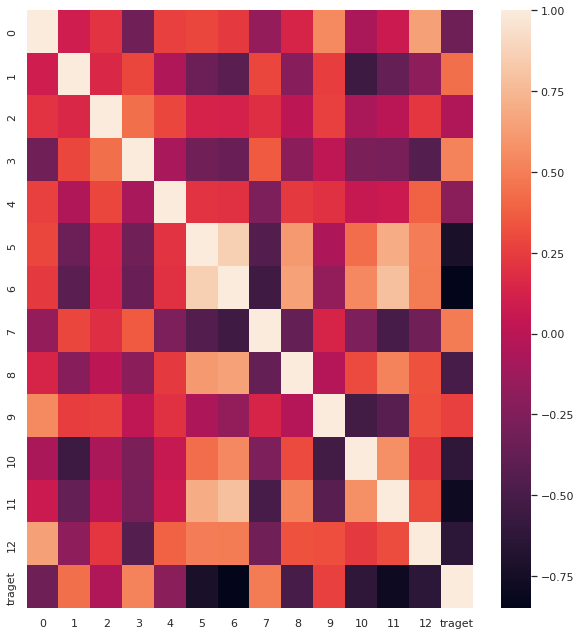

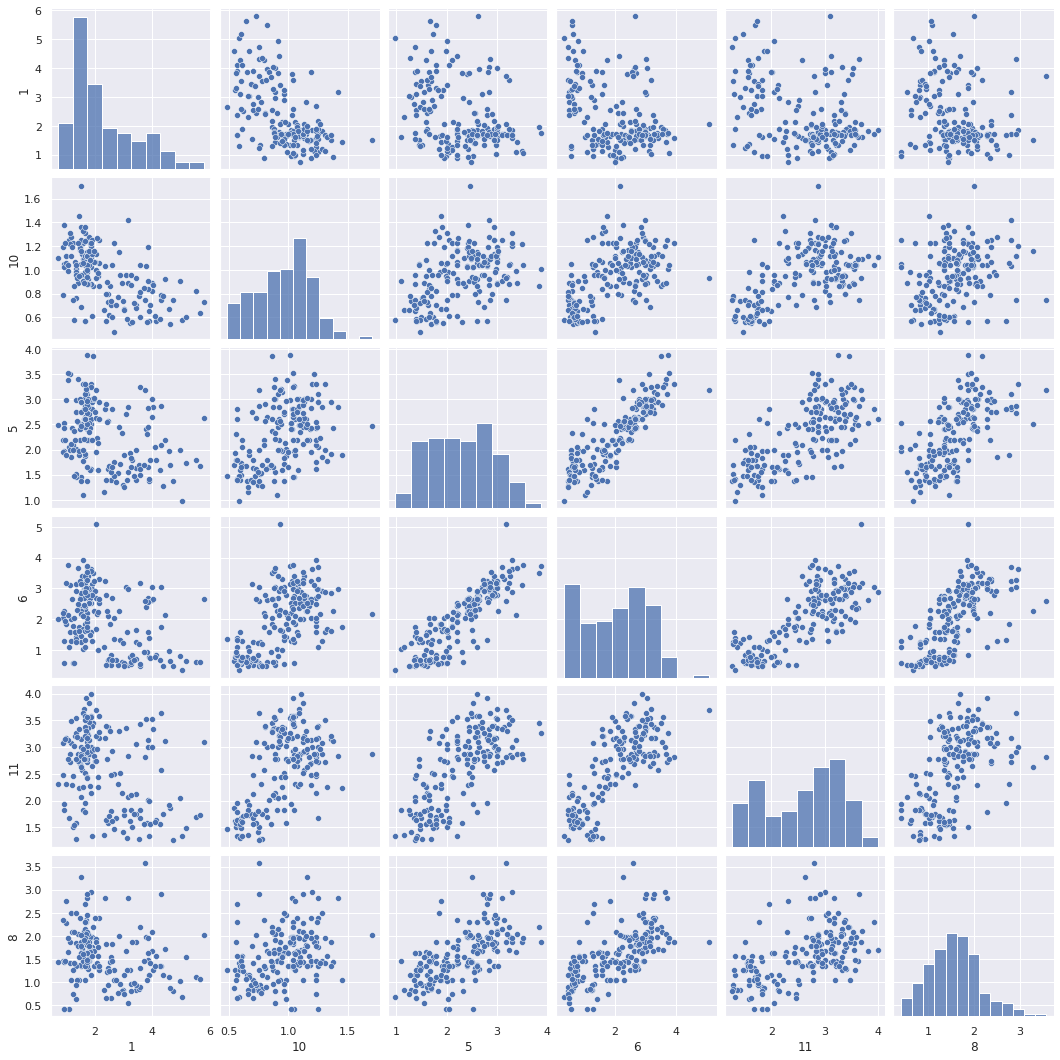

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

raw_wine=load_wine()
X=raw_wine.data
sns.set(rc={'figure.figsize':{11,10}})
y=raw_wine.target
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.7)
raw_wine=pd.DataFrame({'0':raw_wine.data[:,0],'1':raw_wine.data[:,1],'2':raw_wine.data[:,2],'3':raw_wine.data[:,3],'4':raw_wine.data[:,4],'5':raw_wine.data[:,5],
    '6':raw_wine.data[:,6],'7':raw_wine.data[:,7],'8':raw_wine.data[:,8],'9':raw_wine.data[:,9],'10':raw_wine.data[:,10],'11':raw_wine.data[:,11],
    '12':raw_wine.data[:,12],'traget':raw_wine.target})
correlation_matrix=raw_wine.corr().round(2)
sns.heatmap(correlation_matrix)

#pairplot으로 상관도 그래프 그리기
sns.pairplot(raw_wine[['1','10','5','6','11','8']])
raw_wine[['5','6','11','8']].isna().sum()


### linear regression은 결과값이 연속값이기 때문에 분류에 적합하지 않음

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

model=LinearRegression()
model.fit(X_tr,y_tr)
prediction=model.predict(X_te)
prediction=prediction.round(0)
model.score(X_te,y_te)
confusion_matrix(y_te,prediction)

array([[15,  0,  0],
       [ 2, 23,  0],
       [ 0,  2, 12]])

## 다항회귀 polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures()
num=np.arange(2).reshape(-1,1)
print(num)
#poly의 기본값 : 1, x, x^2
#0을 대입하면 1, 0, 0
#1을 대입하면 1, 1, 1
print(poly.fit_transform(num))
print(poly.get_feature_names())


[[0]
 [1]]
[[1. 0. 0.]
 [1. 1. 1.]]
['1', 'x0', 'x0^2']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
num=np.arange(2).reshape(-1,2)
#poly 입력값이 2개라면 : 1, x, y, xy, x^2, y^2
print(num)
print(poly.fit_transform(num))
print(poly.get_feature_names())

[[0 1]]
[[1. 0. 1. 0. 0. 1.]]
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


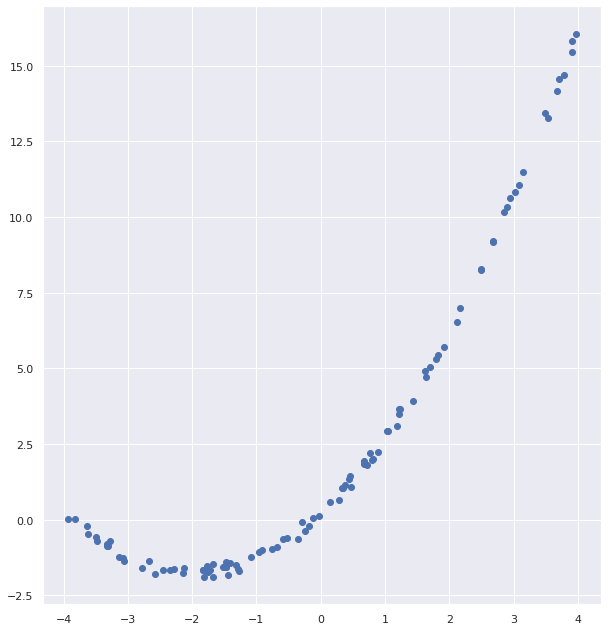

In [ ]:
m=100
#100개의 값을 랜덤히 만듦
X=8*np.random.rand(m,1)-4

y=0.5*X**2+2*X+0.5*np.random.rand(m,1)
plt.scatter(X,y)

In [ ]:
X_poly=poly.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,y)
model.score(X_poly,y).round(3)
model.coef_

array([[0.        , 1.99124941, 0.49902848]])

0.99986099647719
[[0.         0.40143299 1.00069348]]


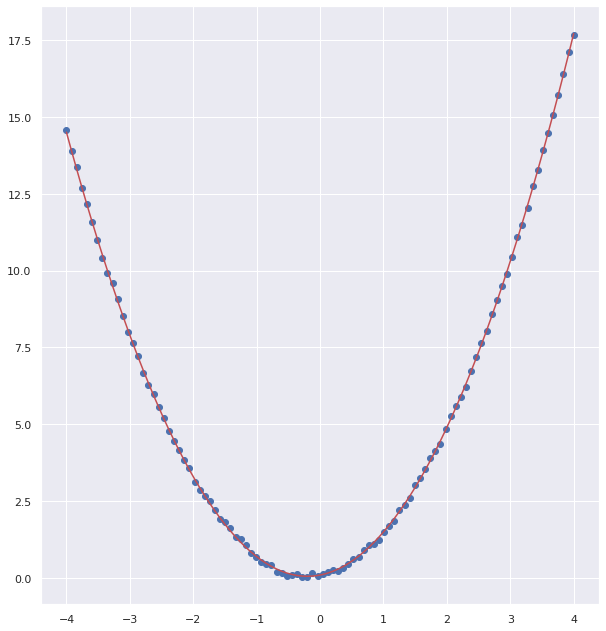

In [ ]:
#linspace : a와 b사이의 값을 랜덤히 만듦
domain=np.linspace(-4,4,100).reshape(-1,1)

#degree값을 조정하여 차항을 조절할 수 있음
poly=PolynomialFeatures(degree=2)

y_domain=domain**2+0.4*domain+0.2*np.random.rand(100,1)
plt.scatter(domain,y_domain)
X_poly=poly.fit_transform(domain)
model.fit(X_poly,y_domain)
prediction=model.predict(X_poly)
plt.plot(domain,prediction,color='r')
print(model.score(X_poly,y_domain))
print(model.coef_)


###과대적합에 주의하자!

1.0
[[ 1.60633001e-20  3.30212287e-21  7.62524815e-23  7.38628534e-22
   1.90631184e-21  1.84648673e-20  4.76556138e-20  4.61537127e-19
   1.19117212e-18  1.15299726e-17  2.97574800e-17  2.87403755e-16
   7.41754711e-16  7.10053789e-15  1.83256389e-14  1.69057849e-13
   4.36318084e-13  3.38088637e-12  8.72566330e-12 -3.38253774e-14
  -8.72992832e-14]]


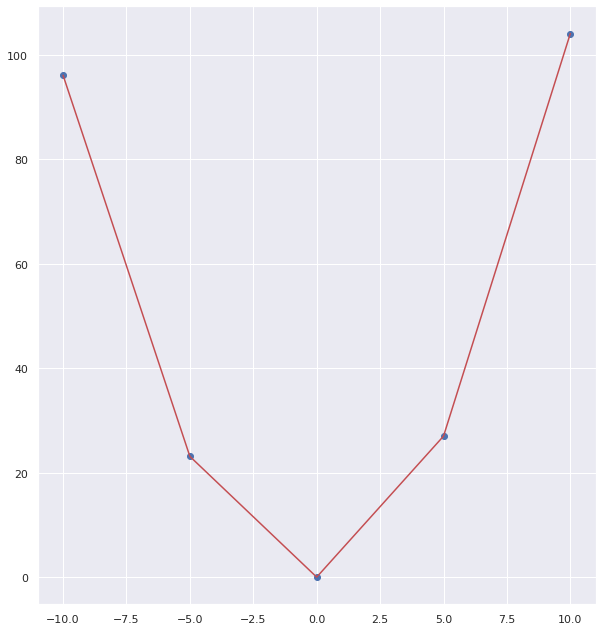

In [ ]:
#linspace : a와 b사이의 값을 랜덤히 만듦
domain=np.linspace(-10,10,5).reshape(-1,1)

#degree값을 조정하여 차항을 조절할 수 있음
poly=PolynomialFeatures(degree=20)

y_domain=domain**2+0.4*domain+0.2*np.random.rand(5,1)
plt.scatter(domain,y_domain)
X_poly=poly.fit_transform(domain)
model.fit(X_poly,y_domain)
prediction=model.predict(X_poly)
plt.plot(domain,prediction,color='r')
print(model.score(X_poly,y_domain))
print(model.coef_)


-1.667796821499498e+20


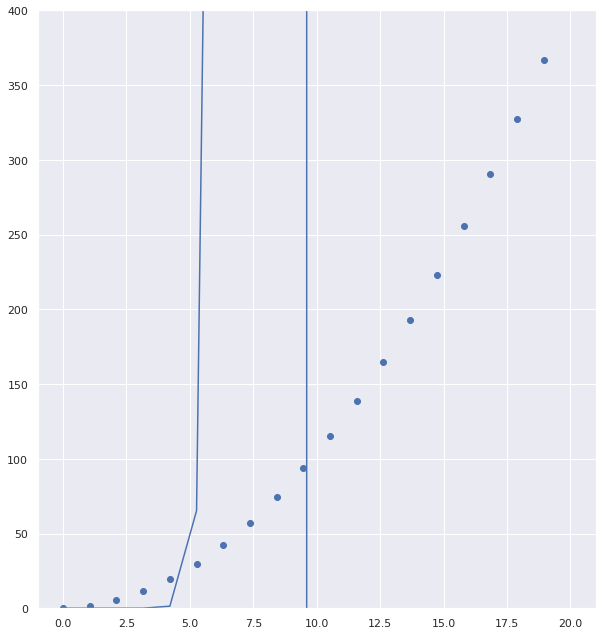

In [ ]:
domain=np.linspace(0,20,20).reshape(-1,1)
y_domain=domain**2+0.4*domain+0.2*np.random.rand(20,1)
X_poly=poly.fit_transform(domain)
prediction=model.predict(X_poly)
print(model.score(X_poly,y_domain))
plt.scatter(domain,y_domain)
plt.ylim(0,400)
plt.plot(domain,prediction)

### 과대적합을 방지하기 위한 릿지 회귀
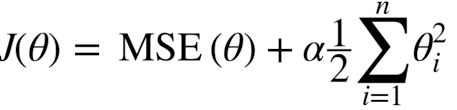

알파값을 조절하여 패널티를 줌

0.971352472772113


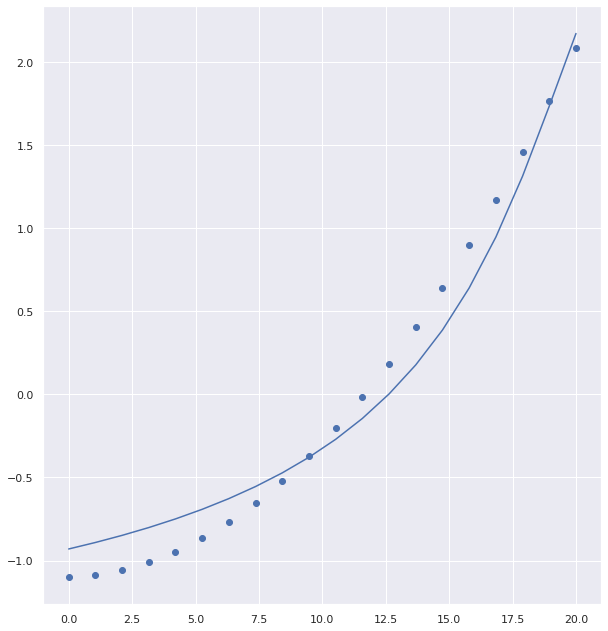

In [183]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_poly_ss=ss.fit_transform(X_poly)
ridge=Ridge(alpha=12) #alpha값을 지정
y_domain_ss=ss.fit_transform(y_domain)
ridge.fit(X_poly_ss,y_domain_ss)
print(ridge.score(X_poly_ss,y_domain_ss))
prediction=ridge.predict(X_poly_ss)
plt.scatter(domain,y_domain_ss)
plt.plot(domain,prediction)

과대적합을 방지하기 위한 라쏘 회귀

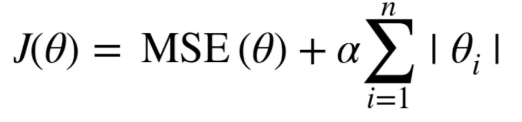

이것또한 패널티 부과하여 과적합 방지

## 로지스틱 회귀
이진 분류 문제를 확률로 표현
오즈비 : 어떤 사건이 일어날 확률과 일어나지 않을 확률 (p/1-p)

로짓함수 : 오즈비에 상용로그를 붙인 수식 ln(p/1-p) : 시그모이드 함수의 역함수



비용함수 : 오차를 나타내는 함수

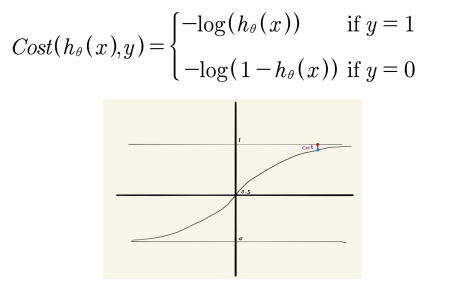

In [192]:
import pandas as pd
data_url= "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
df = pd.read_table(data_url)
df.pop('who') #데이터프레임 feature 삭제
df.pop('Country')
df.pop('Years on Internet')
df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [193]:
for i in df.columns[2:8]:
  df[i]=df[i].astype('category') #one-hot-encoding을 하기 위해 타입을 category로 변환
df_onehot=pd.get_dummies(df)
df_onehot

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19579,0,19.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,0,49.0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
19581,1,42.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [202]:
df_onehot.isnull().sum()
df_onehot.loc[pd.isnull(df_onehot['Age']),'Age']=df_onehot['Age'].mean()
df_onehot.isnull().sum()

Newbie                               0
Age                                  0
Gender_Female                        0
Gender_Male                          0
Household Income_$10-19              0
Household Income_$20-29              0
Household Income_$30-39              0
Household Income_$40-49              0
Household Income_$50-74              0
Household Income_$75-99              0
Household Income_Over $100           0
Household Income_Under $10           0
Sexual Preference_Bisexual           0
Sexual Preference_Gay male           0
Sexual Preference_Heterosexual       0
Sexual Preference_Lesbian            0
Sexual Preference_Transgender        0
Sexual Preference_na                 0
Education Attainment_College         0
Education Attainment_Doctoral        0
Education Attainment_Grammar         0
Education Attainment_High School     0
Education Attainment_Masters         0
Education Attainment_Other           0
Education Attainment_Professional    0
Education Attainment_Some

In [217]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_data=df_onehot.iloc[:,1:].values
y_data=df_onehot.iloc[:,0].values.reshape(-1,1)
print(y_data.shape)
X_data=mm.fit_transform(X_data)
X_tr,X_te,y_tr,y_te=train_test_split(X_data,y_data,train_size=0.33)

(19583, 1)


In [228]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(fit_intercept=True)
print(y_tr.shape)
y_tr=y_tr.flatten()
LR.fit(X_tr,y_tr)
print(LR.predict(X_te[:5]))
prediction=LR.predict(X_te)
print(LR.predict_log_proba(X_te[:5]))


(6462,)
[1 1 0 0 0]
[[-1.00938058 -0.4532561 ]
 [-0.75570375 -0.6342746 ]
 [-0.35694704 -1.2033382 ]
 [-0.16027593 -1.90992624]
 [-0.43788167 -1.03677094]]


In [231]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(prediction,y_te))
print(accuracy_score(prediction,y_te))

[[9203 2610]
 [ 611  697]]
0.7545156619160125


# 분류와 군집화

## KNN 알고리즘
근접한 n개의 데이터를 비교하여 군집을 판별

수가 같은 경우에는 거리를 비교하여 짧은 거리의 군집에 할당

표준화가 중요하다. 거리가 커지면 판별에 오차가 생기기 때문에 정규화가 필요하다.

In [256]:
from sklearn.neighbors import KNeighborsClassifier
# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

dach_data=np.column_stack((dach_length,dach_height)) #column 합치기
dach_label=np.zeros(len(dach_length)) #닥스훈트 label 만들기
jin_data=np.column_stack((jin_length,jin_height))
jin_label=np.zeros(len(jin_length))+1 #진돗개 label 만들기

dog_data=np.concatenate((dach_data,jin_data)) #array 병합하기
dog_label=np.concatenate((dach_label,jin_label))

dog={0:'닥스훈트', 1:'진돗개'}



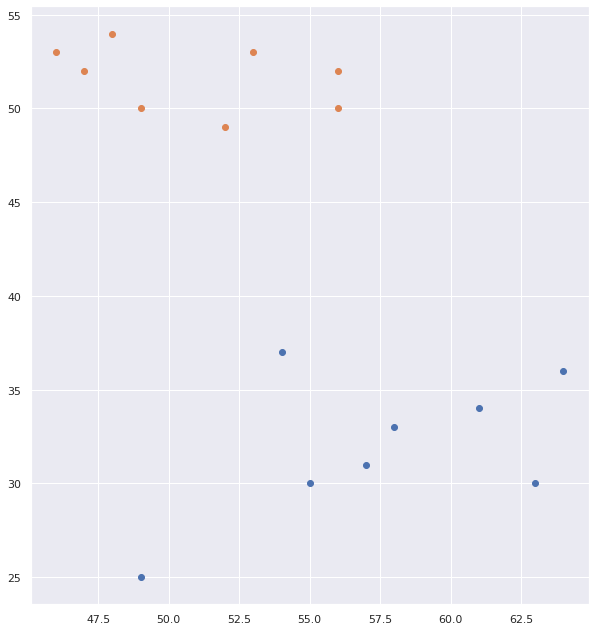

In [259]:
plt.scatter(dach_length,dach_height)
plt.scatter(jin_length,jin_height)

In [271]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(dog_data,dog_label)
y_predict=knn.predict([[60,30]])
print(dog[int(y_predict)])

닥스훈트


## K-means 클러스터링
비지도학습

 K-means 알고리즘(K-means algorithm)은 주어진 n개의 관측값을 k개의 클러스터로 분할하는 알고리즘으로, 관측값들은 거리가 최소인 클러스터로 분류된다.

 1. 무작위의 k개의 점을 선택한다.
 2. 주변의 점들의 평균을 구하여 k개의 평균을 업데이트한다.
 3. 움직이지 않을 때까지 평균을 구하여 업데이트 한다. (실제로는 어느정도의 오차값에 도달하면 중단함.)

In [275]:
game_usage=pd.read_csv('https://raw.githubusercontent.com/dongupak/DataML/main/csv/game_usage.csv')
game_usage

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109
...,...,...
95,47,939
96,50,485
97,13,916
98,79,235


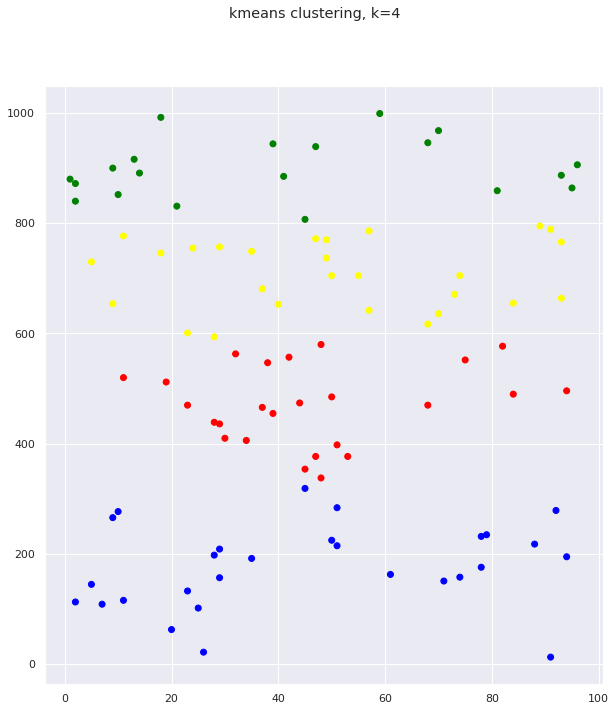

In [284]:
from sklearn import cluster

X=game_usage['time spent']
y=game_usage['game level']

def k_meansPlot(data,k):
  model=cluster.KMeans(n_clusters=k)
  model.fit(data)
  label=model.predict(data)
  colors=np.array(['red','green','blue','yellow'])
  plt.suptitle('kmeans clustering, k={}'.format(k))
  plt.scatter(data[:,0],data[:,1],color=colors[label])

gamer_data=np.column_stack((X,y))
k_meansPlot(gamer_data,k=4)

## SVM
• SVM은 두 데이터 그룹을 나누는 평면 중에서 폭이 가장 넓은 것을 찾는 방법이다. 이 분리
평면은 결정 경계라고도 한다.

• 결정 경계면은 2차원에서는 직선이지만 그 이상의 차원에서는 가시화할 수 없는 평면으로
초평면hyperplane이라고 부른다. 

• 결정 경계와 서포트 벡터 사이의 거리를 마진margin이라고 부른다. 

• 그림에서 볼 수 있는 것처럼 어떠한 데이터도 이 마진 내에 들어오지 않는다. 이렇게 엄격하게 지켜져야 하는 마진을 하드 마진hard margin이라고 부른다.

• 그런데 어떤 경우에는 마진 안에 아무런 데이터도 들어오지 않도록 하는 것이 불가능할 수도
있다. 그리고 불가능하지는 않더라도 어떤 데이터는 잡음이나 이상치로 판단하여 무시하는
것이 좋을 수도 있다. 

• 이럴 때는 일부 데이터가 마진 내에 들어오도록 허용하면서 분리 평면을 찾을 수 있다. 이것은 소프트 마진soft margin이라고 부른다.



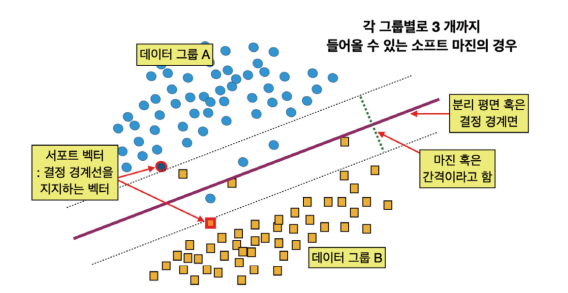

마진이 클 수록 좋다. 마진이 클수록 일반화하기 적절하기 때문이다.
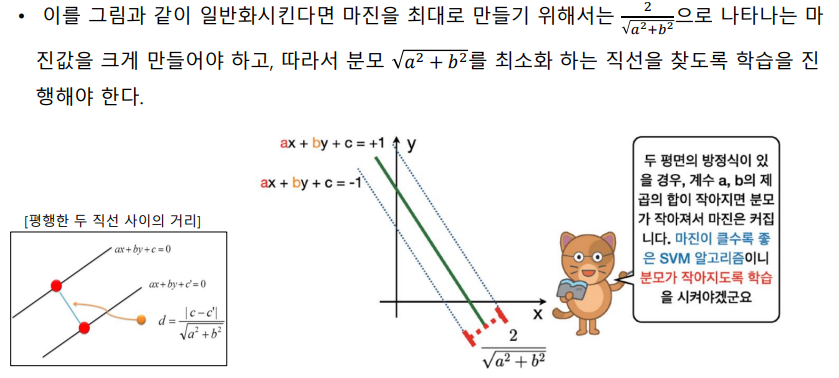

분류 오류와 마진 오류를 적절히 트레이드오프하여 설계해야 한다. 이를 위해 필요한 파라미터가 바로 C(cost)라고 하는 하이퍼파라미터이다.

svm 오류는 C*분류 오류 + 마진 오류로 이루어져 있다.
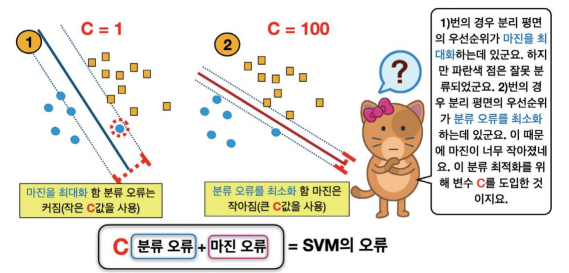

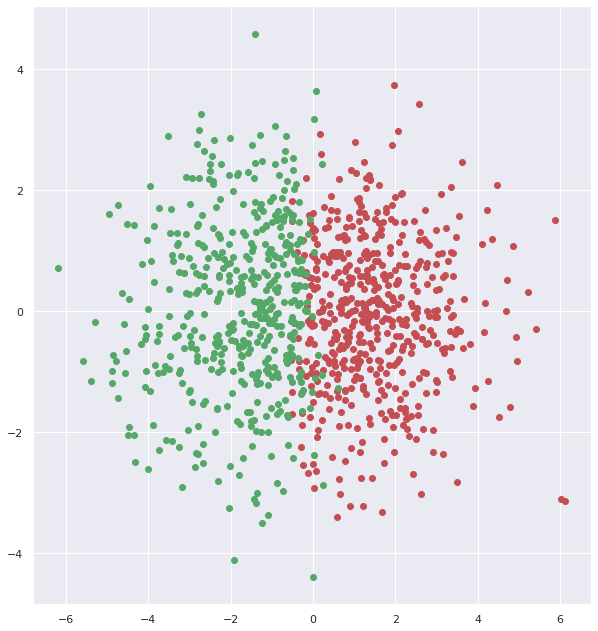

In [296]:
df=pd.read_csv('https://github.com/dongupak/DataML/raw/main/csv/two_classes.csv')
df_positive=df[df['y']==1]
df_negative=df[df['y']==0]
plt.scatter(df_positive['x1'],df_positive['x2'],color='r')
plt.scatter(df_negative['x1'],df_negative['x2'],color='g')

In [297]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X=df[['x1','x2']].to_numpy()
y=df['y']
svm=Pipeline([('scaler',StandardScaler()),('linearSVC',LinearSVC(C=1,loss='hinge'))])

svm.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [298]:
prediction=svm.predict([[0.12,0.56]])
print(dog[prediction[0]])

진돗개


### iris를 svm을 이용하여 분류하기

In [312]:
from sklearn.datasets import load_iris

raw_iris=load_iris()
X=raw_iris.data
y=raw_iris.target
df_x=pd.DataFrame(X)
X=df_x[[0,1]].to_numpy()
svm=Pipeline([('scaler',StandardScaler()),('linearSVC',LinearSVC(C=1,loss='hinge'))])

svm.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [318]:
prediction=svm.predict([[5.5,1.7]])
print(prediction)

[1]
